# Wine Quality Data Set - Jeannette Navarro


P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


>**Data:**
https://archive.ics.uci.edu/ml/datasets/wine+quality


>**Data Set Description:**
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names


**Objective of Analysis:** Prediction of quality based on the physicochemical properties of wine. A predictive model is expected to provide guidance to vineyards and will help on the pricing effort.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

#Load data
red = pd.read_csv('C:\Users\jnavarro\Desktop\Data Science Fundamentals\Statistics for Data Science\Term Project\winequality-red.csv', sep=';')
white = pd.read_csv('C:\Users\jnavarro\Desktop\Data Science Fundamentals\Statistics for Data Science\Term Project\winequality-white.csv', sep=';')

#Remove space of column name and replace it with '_'
red.columns = red.columns.str.replace('\s', '_')
white.columns = white.columns.str.replace('\s', '_')

# Exploratory Analysis
## Stage I: Univariate Analysis

In [23]:
red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [26]:
white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


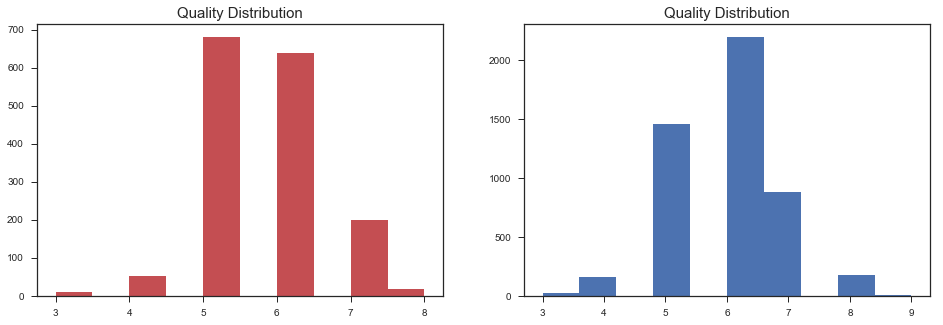

In [72]:
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
ax1.set_title('Quality Distribution', fontsize=15)
plt.hist(red.quality, color='C2')

## right panel
ax2 = fig.add_subplot(122)
ax2.set_title('Quality Distribution', fontsize=15)
plt.hist(white.quality)

plt.savefig('C:\Users\jnavarro\Desktop\Data Science Fundamentals\Statistics for Data Science\Term Project\Plots\Histogram_Quality.jpeg')
plt.show();

In [28]:
#Frequency distribution of wines
def frequencyDists(wine_set):
    print("This is the frequency distribution of the wines' quality.")
    print(wine_set.groupby("quality").size()*100 / len(wine_set))
print()

frequencyDists(red)
frequencyDists(white)

()
This is the frequency distribution of the wines' quality.
quality
3     0.625391
4     3.314572
5    42.589118
6    39.899937
7    12.445278
8     1.125704
dtype: float64
This is the frequency distribution of the wines' quality.
quality
3     0.408330
4     3.327889
5    29.746835
6    44.875459
7    17.966517
8     3.572887
9     0.102082
dtype: float64


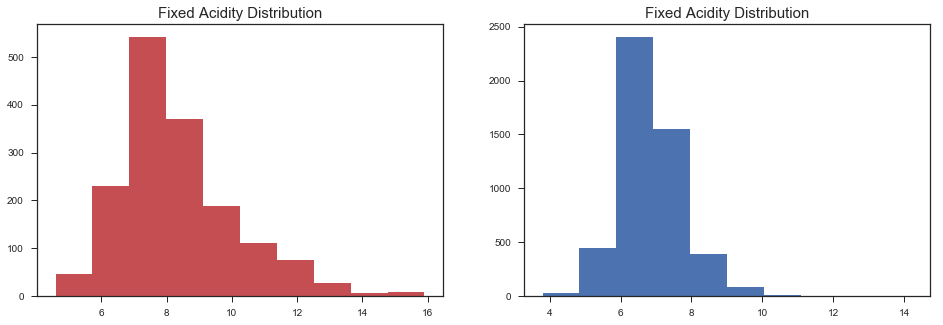

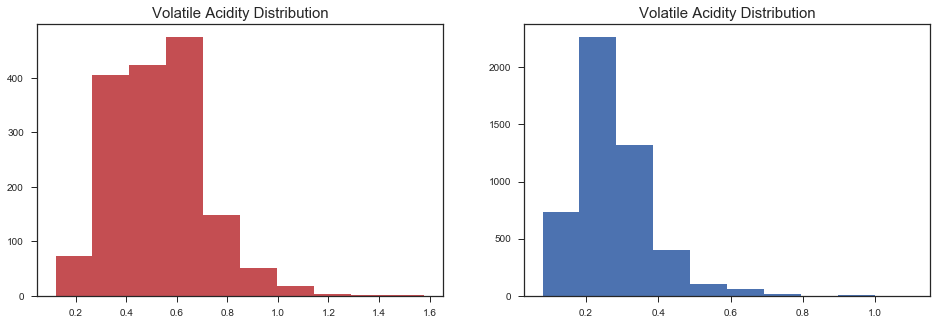

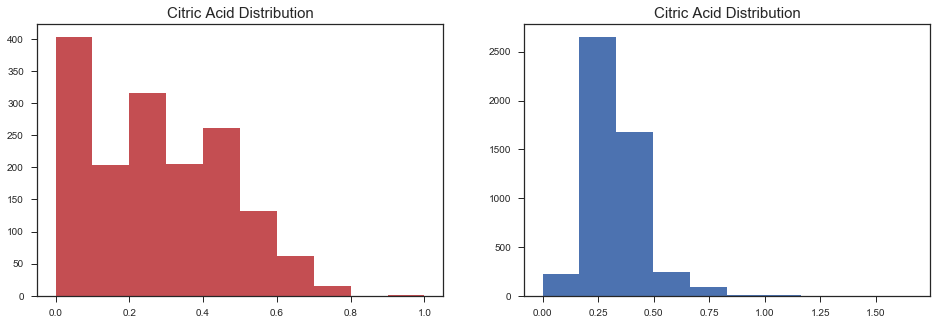

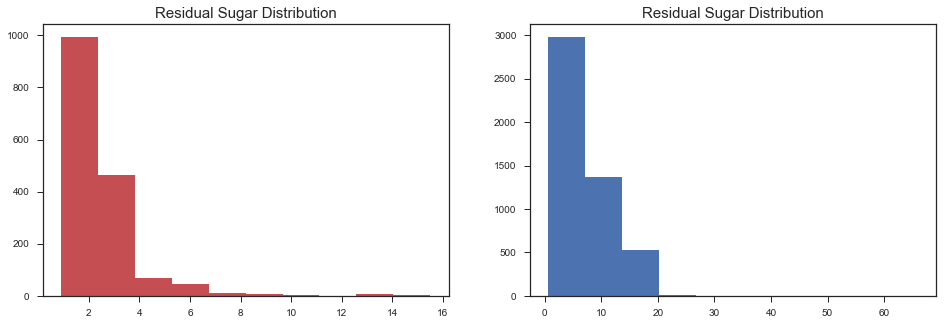

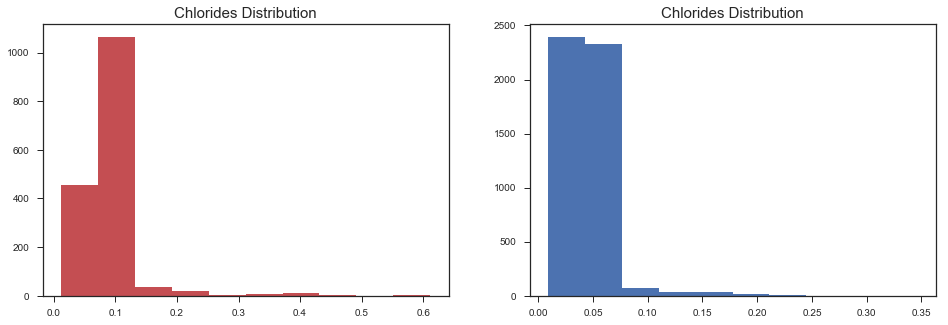

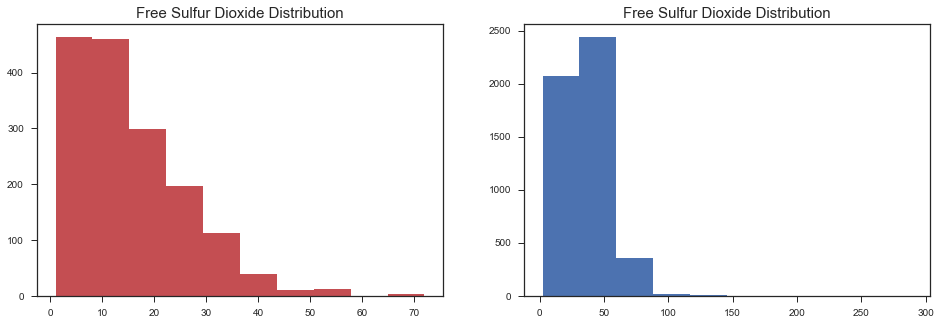

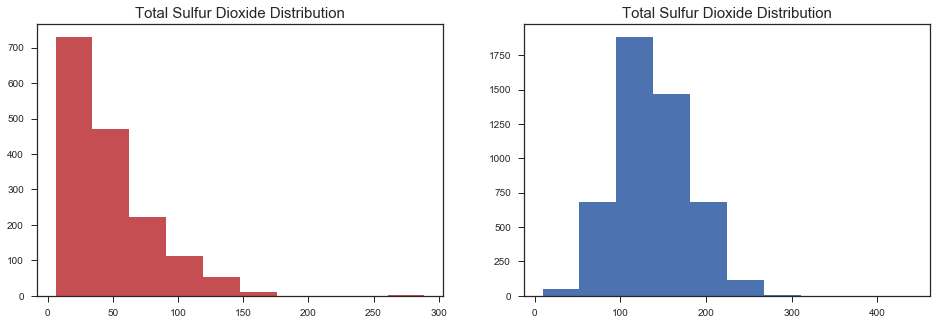

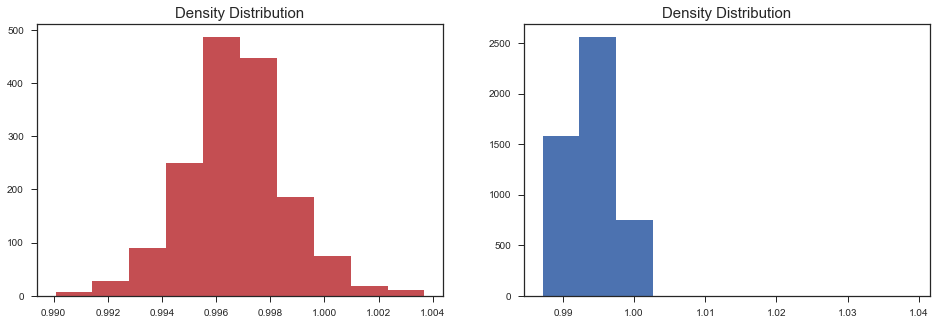

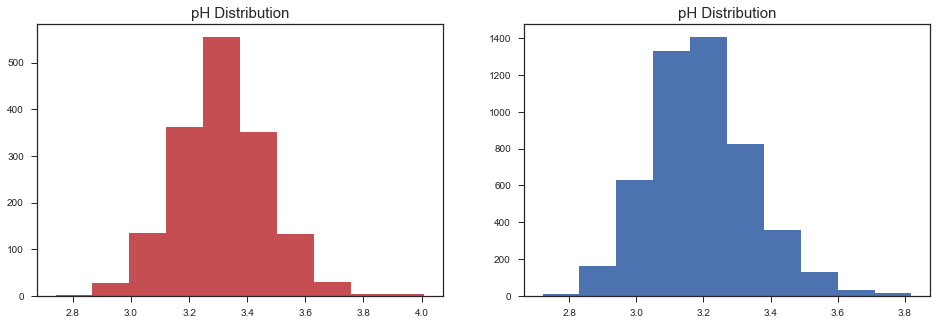

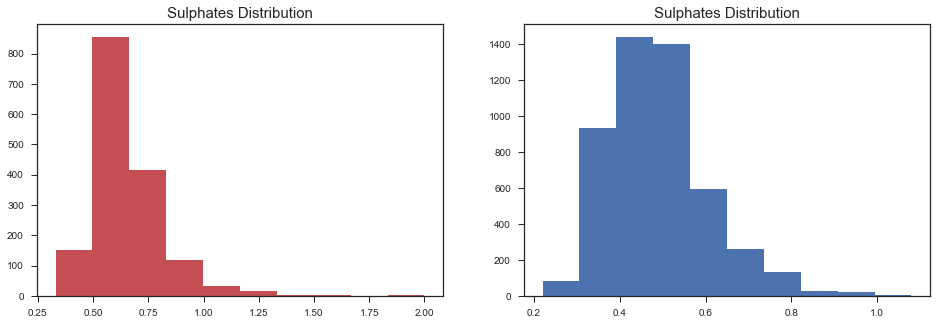

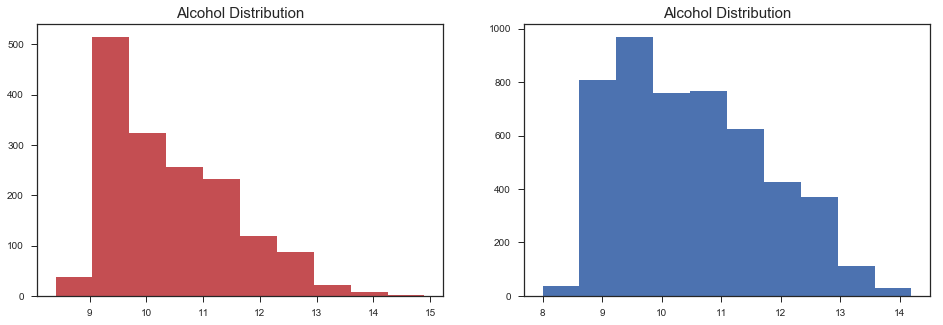

In [71]:
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
ax1.set_title('Fixed Acidity Distribution', fontsize=15)
plt.hist(red.fixed_acidity, color='C2')

## right panel
ax2 = fig.add_subplot(122)
ax2.set_title('Fixed Acidity Distribution', fontsize=15)
plt.hist(white.fixed_acidity)

plt.show()

#----------------------------------------------------------
    
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
ax1.set_title('Volatile Acidity Distribution', fontsize=15)
plt.hist(red.volatile_acidity, color='C2')

## right panel
ax2 = fig.add_subplot(122)
ax2.set_title('Volatile Acidity Distribution', fontsize=15)
plt.hist(white.volatile_acidity)

plt.show()

#----------------------------------------------------------
    
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
ax1.set_title('Citric Acid Distribution', fontsize=15)
plt.hist(red.citric_acid, color='C2')

## right panel
ax2 = fig.add_subplot(122)
ax2.set_title('Citric Acid Distribution', fontsize=15)
plt.hist(white.citric_acid)

plt.show()

#----------------------------------------------------------
    
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
ax1.set_title('Residual Sugar Distribution', fontsize=15)
plt.hist(red.residual_sugar, color='C2')

## right panel
ax2 = fig.add_subplot(122)
ax2.set_title('Residual Sugar Distribution', fontsize=15)
plt.hist(white.residual_sugar)

plt.show()

#----------------------------------------------------------
    
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
ax1.set_title('Chlorides Distribution', fontsize=15)
plt.hist(red.chlorides, color='C2')

## right panel
ax2 = fig.add_subplot(122)
ax2.set_title('Chlorides Distribution', fontsize=15)
plt.hist(white.chlorides)

plt.show()

#----------------------------------------------------------
    
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
ax1.set_title('Free Sulfur Dioxide Distribution', fontsize=15)
plt.hist(red.free_sulfur_dioxide, color='C2')

## right panel
ax2 = fig.add_subplot(122)
ax2.set_title('Free Sulfur Dioxide Distribution', fontsize=15)
plt.hist(white.free_sulfur_dioxide)

plt.show()

#----------------------------------------------------------
    
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
ax1.set_title('Total Sulfur Dioxide Distribution', fontsize=15)
plt.hist(red.total_sulfur_dioxide, color='C2')

## right panel
ax2 = fig.add_subplot(122)
ax2.set_title('Total Sulfur Dioxide Distribution', fontsize=15)
plt.hist(white.total_sulfur_dioxide)

plt.show()

#----------------------------------------------------------
    
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
ax1.set_title('Density Distribution', fontsize=15)
plt.hist(red.density, color='C2')

## right panel
ax2 = fig.add_subplot(122)
ax2.set_title('Density Distribution', fontsize=15)
plt.hist(white.density)

plt.show()

#----------------------------------------------------------
    
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
ax1.set_title('pH Distribution', fontsize=15)
plt.hist(red.pH, color='C2')

## right panel
ax2 = fig.add_subplot(122)
ax2.set_title('pH Distribution', fontsize=15)
plt.hist(white.pH)

plt.show()

#----------------------------------------------------------
    
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
ax1.set_title('Sulphates Distribution', fontsize=15)
plt.hist(red.sulphates, color='C2')

## right panel
ax2 = fig.add_subplot(122)
ax2.set_title('Sulphates Distribution', fontsize=15)
plt.hist(white.sulphates)

plt.show()

#----------------------------------------------------------
    
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
ax1.set_title('Alcohol Distribution', fontsize=15)
plt.hist(red.alcohol, color='C2')

## right panel
ax2 = fig.add_subplot(122)
ax2.set_title('Alcohol Distribution', fontsize=15)
plt.hist(white.alcohol)

plt.savefig('C:\Users\jnavarro\Desktop\Data Science Fundamentals\Statistics for Data Science\Term Project\Plots\Histograms.jpeg')
plt.show();

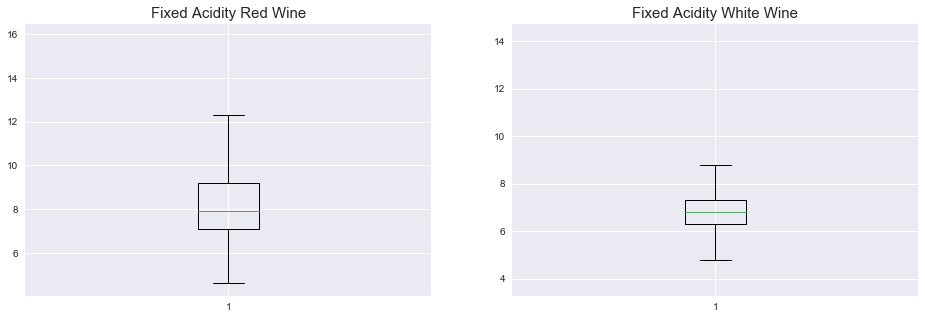

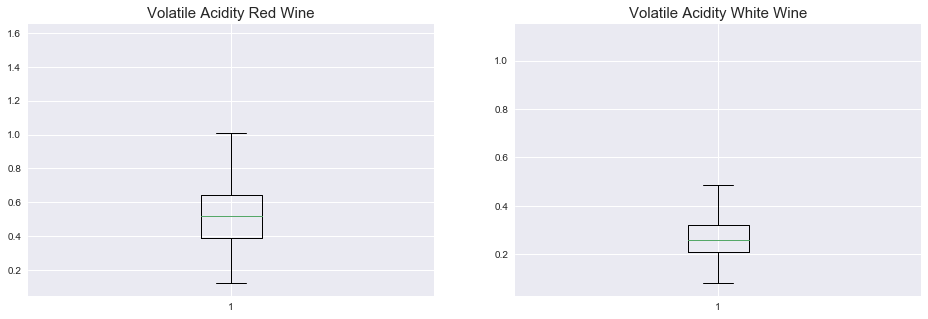

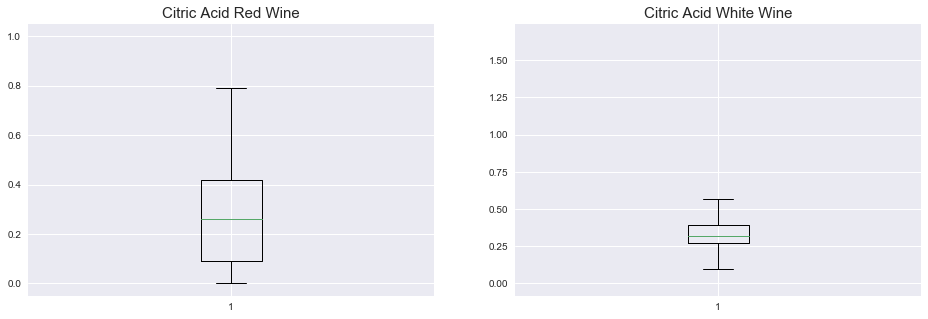

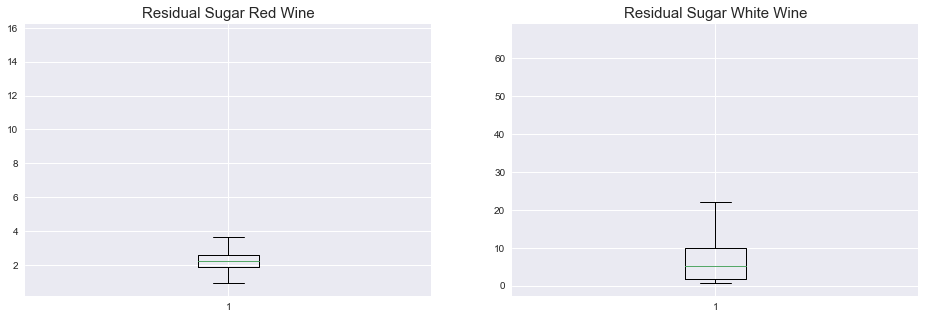

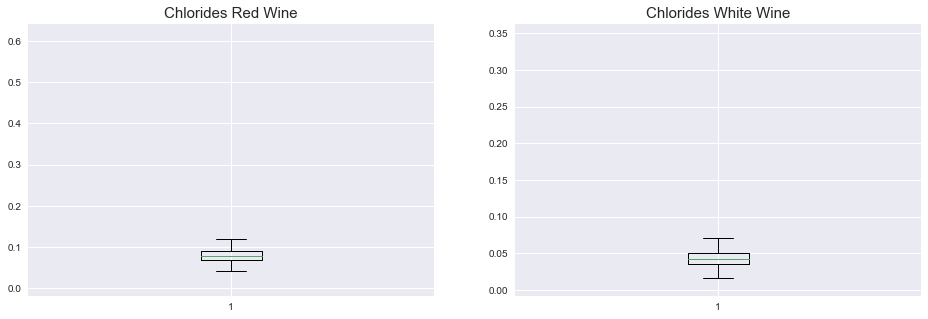

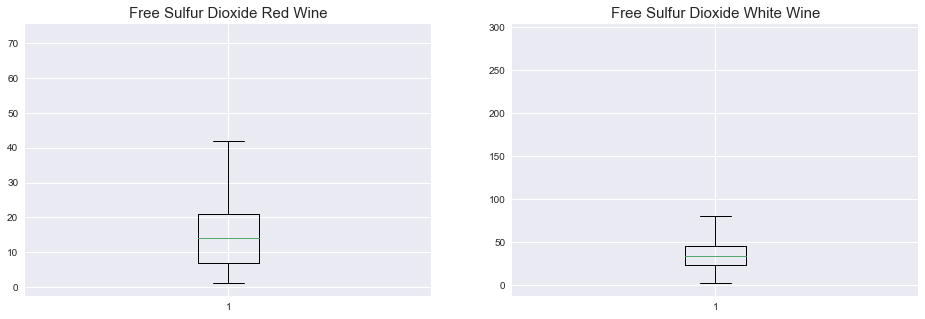

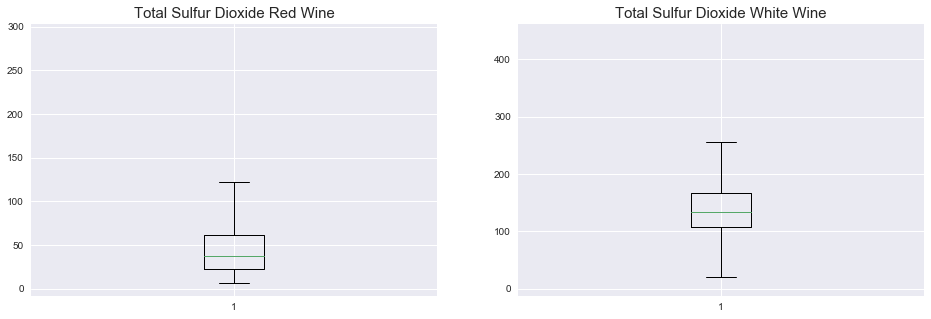

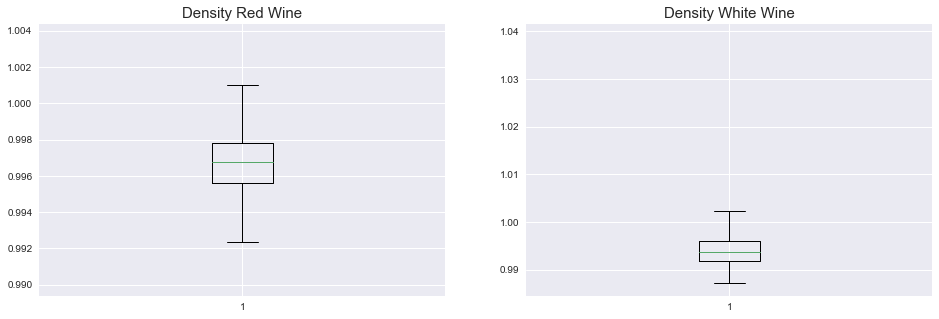

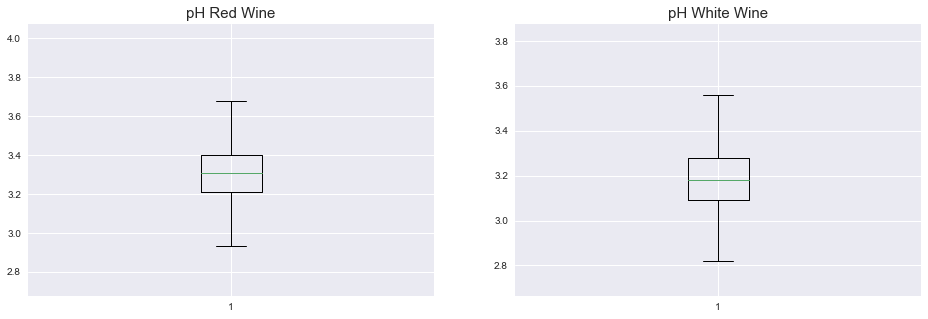

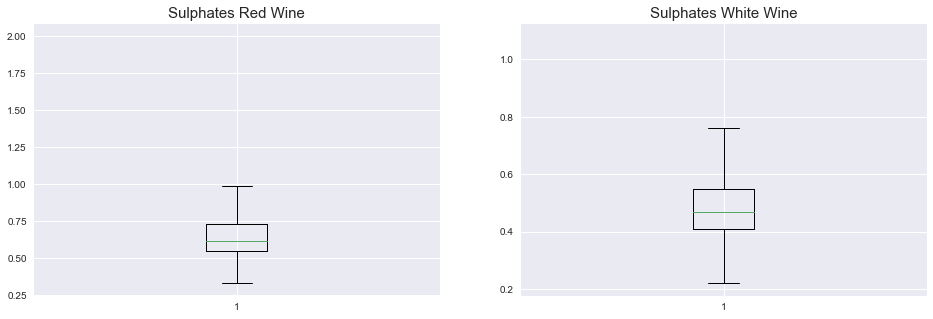

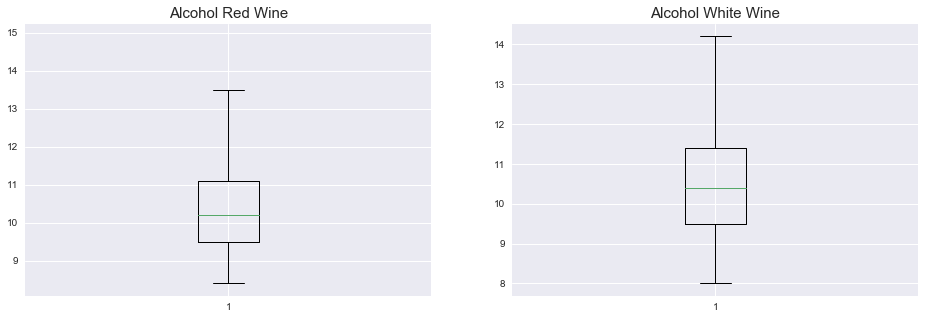

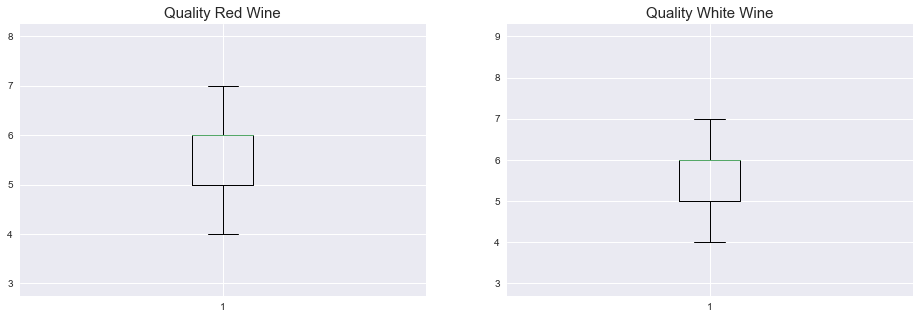

In [7]:
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
plt.boxplot([red.fixed_acidity])
ax1.set_title('Fixed Acidity Red Wine', fontsize=15)

## right panel
ax2 = fig.add_subplot(122)
plt.boxplot([white.fixed_acidity])
ax2.set_title('Fixed Acidity White Wine', fontsize=15)

plt.show()

#----------------------------------------------------------

fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
plt.boxplot([red.volatile_acidity])
ax1.set_title('Volatile Acidity Red Wine', fontsize=15)

## right panel
ax2 = fig.add_subplot(122)
plt.boxplot([white.volatile_acidity])
ax2.set_title('Volatile Acidity White Wine', fontsize=15)

plt.show()

#----------------------------------------------------------

fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
plt.boxplot([red.citric_acid])
ax1.set_title('Citric Acid Red Wine', fontsize=15)

## right panel
ax2 = fig.add_subplot(122)
plt.boxplot([white.citric_acid])
ax2.set_title('Citric Acid White Wine', fontsize=15)

plt.show()

#----------------------------------------------------------

fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
plt.boxplot([red.residual_sugar])
ax1.set_title('Residual Sugar Red Wine', fontsize=15)

## right panel
ax2 = fig.add_subplot(122)
plt.boxplot([white.residual_sugar])
ax2.set_title('Residual Sugar White Wine', fontsize=15)

plt.show()

#----------------------------------------------------------

fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
plt.boxplot([red.chlorides])
ax1.set_title('Chlorides Red Wine', fontsize=15)

## right panel
ax2 = fig.add_subplot(122)
plt.boxplot([white.chlorides])
ax2.set_title('Chlorides White Wine', fontsize=15)

plt.show()

#----------------------------------------------------------

fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
plt.boxplot([red.free_sulfur_dioxide])
ax1.set_title('Free Sulfur Dioxide Red Wine', fontsize=15)

## right panel
ax2 = fig.add_subplot(122)
plt.boxplot([white.free_sulfur_dioxide])
ax2.set_title('Free Sulfur Dioxide White Wine', fontsize=15)

plt.show()

#----------------------------------------------------------

fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
plt.boxplot([red.total_sulfur_dioxide])
ax1.set_title('Total Sulfur Dioxide Red Wine', fontsize=15)

## right panel
ax2 = fig.add_subplot(122)
plt.boxplot([white.total_sulfur_dioxide])
ax2.set_title('Total Sulfur Dioxide White Wine', fontsize=15)

plt.show()

#----------------------------------------------------------
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
plt.boxplot([red.density])
ax1.set_title('Density Red Wine', fontsize=15)

## right panel
ax2 = fig.add_subplot(122)
plt.boxplot([white.density])
ax2.set_title('Density White Wine', fontsize=15)

plt.show()

#----------------------------------------------------------
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
plt.boxplot([red.pH])
ax1.set_title('pH Red Wine', fontsize=15)

## right panel
ax2 = fig.add_subplot(122)
plt.boxplot([white.pH])
ax2.set_title('pH White Wine', fontsize=15)

plt.show()

#----------------------------------------------------------
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
plt.boxplot([red.sulphates])
ax1.set_title('Sulphates Red Wine', fontsize=15)

## right panel
ax2 = fig.add_subplot(122)
plt.boxplot([white.sulphates])
ax2.set_title('Sulphates White Wine', fontsize=15)

plt.show()

#----------------------------------------------------------
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
plt.boxplot([red.alcohol])
ax1.set_title('Alcohol Red Wine', fontsize=15)

## right panel
ax2 = fig.add_subplot(122)
plt.boxplot([white.alcohol])
ax2.set_title('Alcohol White Wine', fontsize=15)

plt.show()

#----------------------------------------------------------
fig = plt.figure(figsize=(16, 5))

## left panel
ax1 = fig.add_subplot(121)
plt.boxplot([red.quality])
ax1.set_title('Quality Red Wine', fontsize=15)

## right panel
ax2 = fig.add_subplot(122)
plt.boxplot([white.quality])
ax2.set_title('Quality White Wine', fontsize=15)


#plt.savefig('C:\Users\jnavarro\Desktop\Data Science Fundamentals\Statistics for Data Science\Term Project\Plots\BoxPlots_alc.jpeg')
plt.show();

**Observations from Exploratory Analysis - Stage I:**
- Quality values are concentrated around 5, 6 and 7. Only a small portion are in 3, 4 and 8. No observations in 1, 2 and 10.

- Outliers detected in:
    - Citric Acid Red Wine
    - Residual Sugar White Wine
    - Free Sulfur Dioxide Red Wine
    - Alcohol Red and White wine
    
I have decided to keep the outliers in the data because they are not too extreme and I want to models to account of those edge cases.

# Exploratory Analysis
## Stage II: Correlations

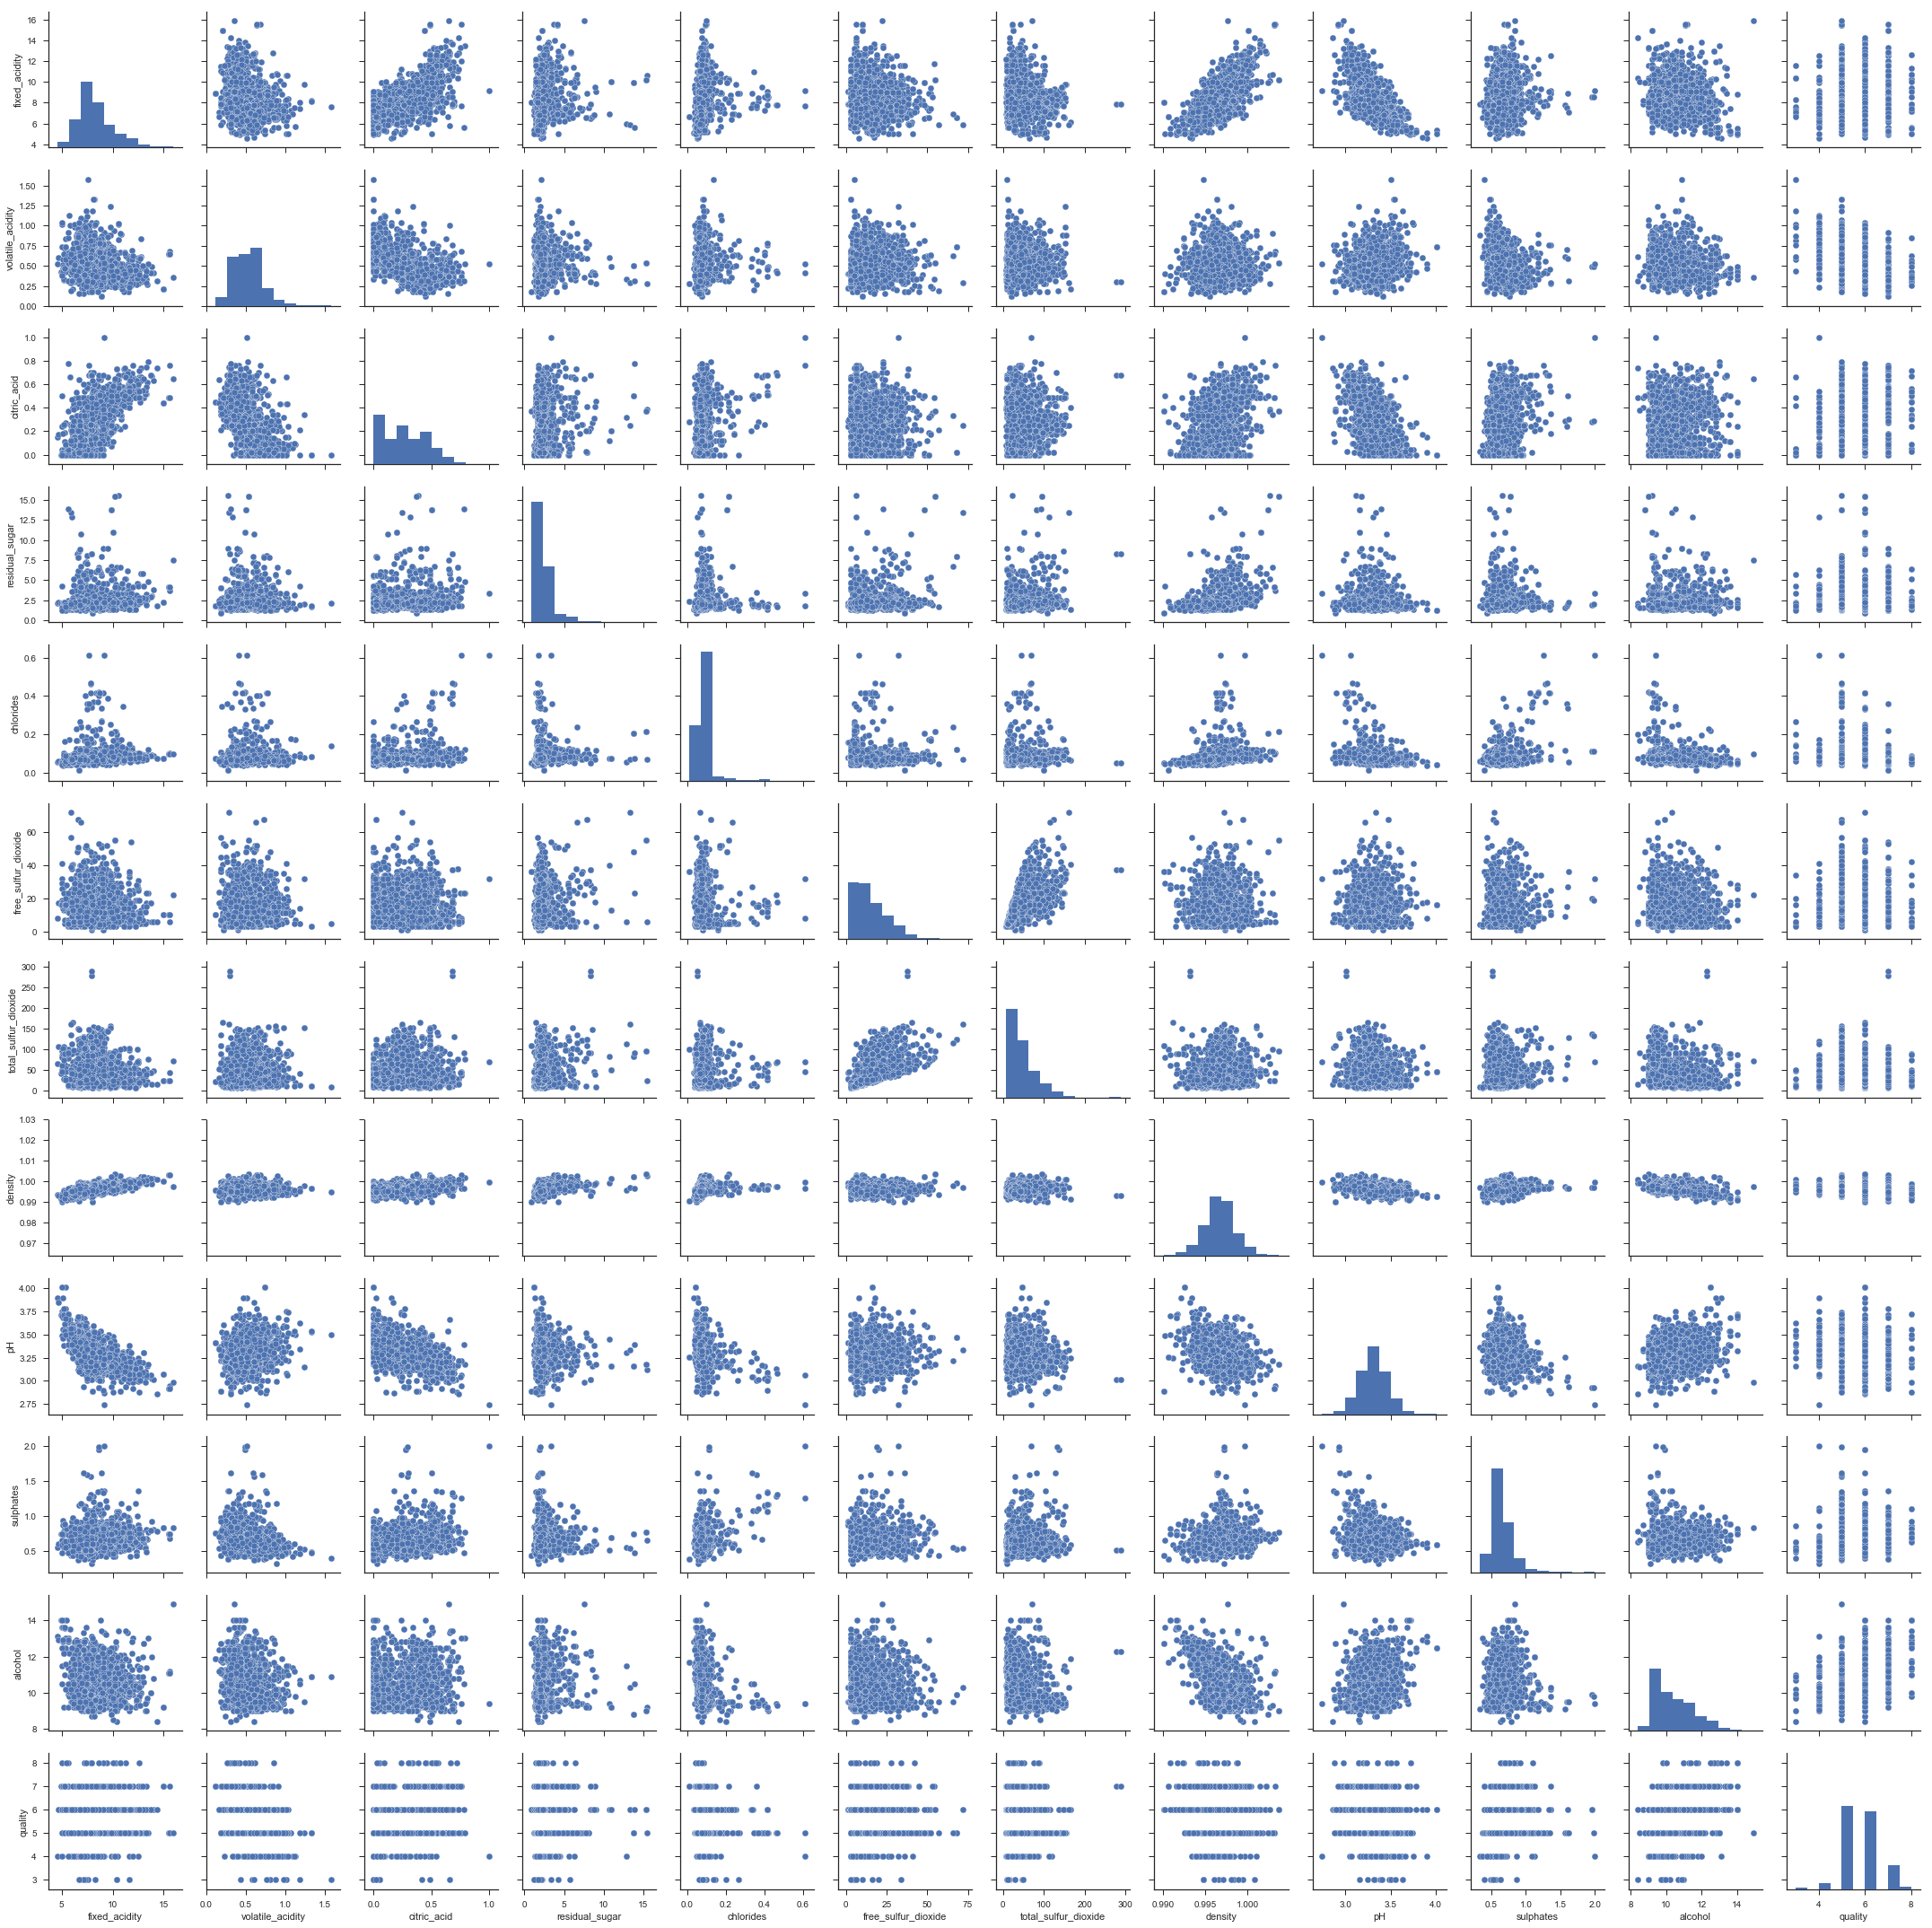

In [78]:
#Red Wine - Matrix Scatter Plot (seaborn)
seaborn.set(style="ticks")
seaborn.pairplot(red)
plt.savefig('C:\Users\jnavarro\Desktop\Data Science Fundamentals\Statistics for Data Science\Term Project\Plots\Matrix_scatter_red.jpeg')
plt.show();

C:\Users\jnavarro\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


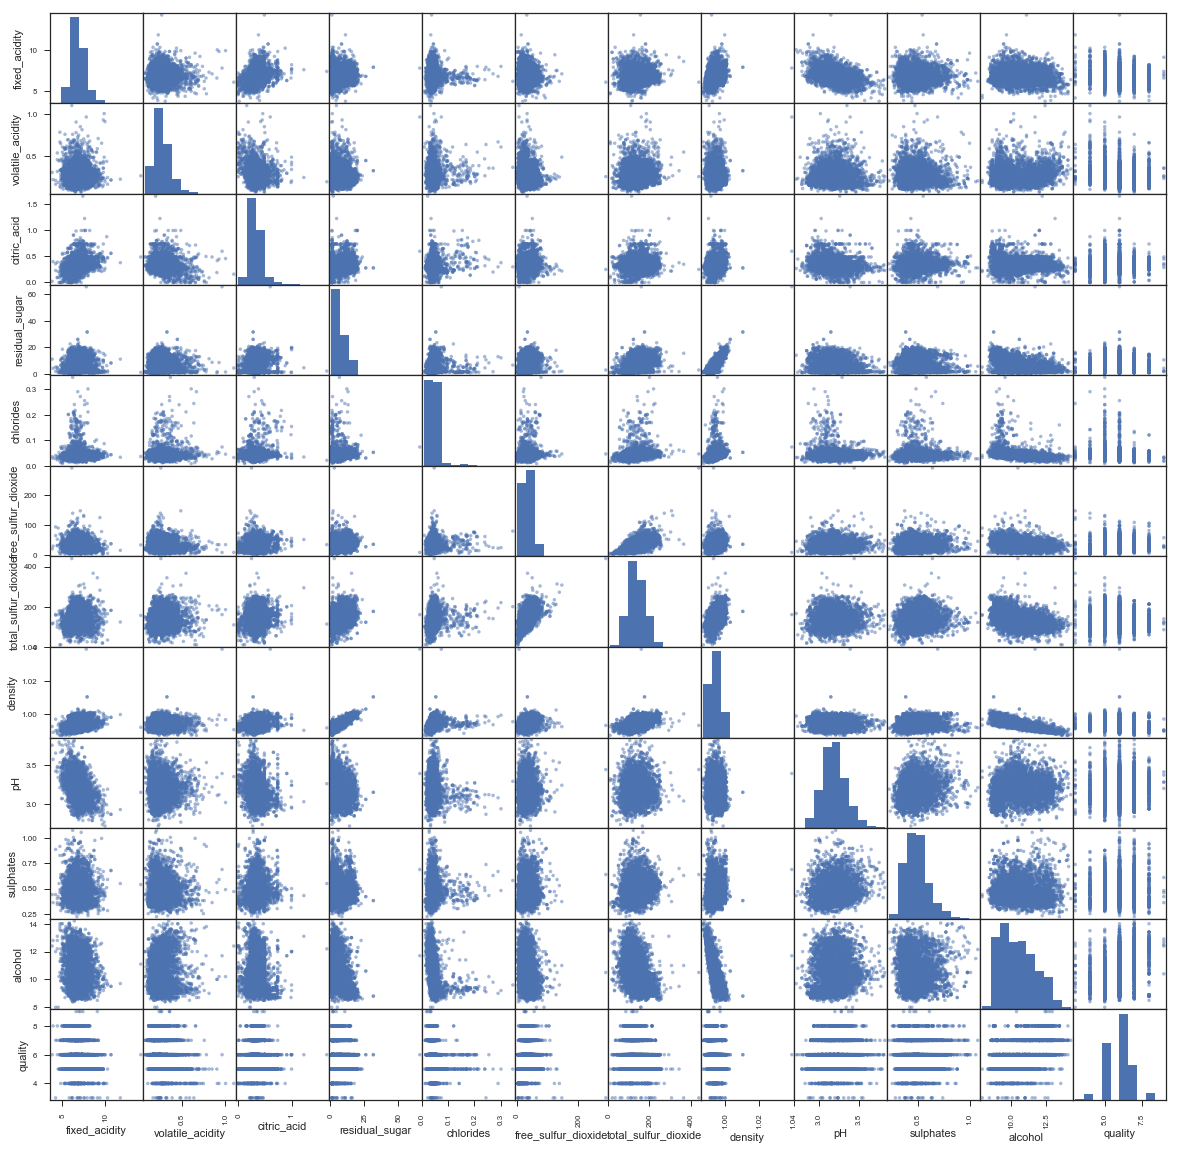

In [79]:
#White Wine - Matrix Scatter Plot (Pandas scatter_matrix)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(white, figsize = (20,20))
plt.savefig('C:\Users\jnavarro\Desktop\Data Science Fundamentals\Statistics for Data Science\Term Project\Plots\Matrix_scatter_white.jpeg')
plt.show();

**Observations from Exploratory Analysis - Stage II:**
 
- Visually  can spot some correlations between:  
    - Fixed Acidity and Density in Red Wine
    - Fixed Acidity and pH in Red Wine
    - Volatile Acidity and Quality in Red Wine
    - Alcohol and Quality and Red Wine
    - Residual Sugar and Density in White Wine
    - Volatile Acidity and Quality in White Wine
    - Alcohol and Quality and White Wine

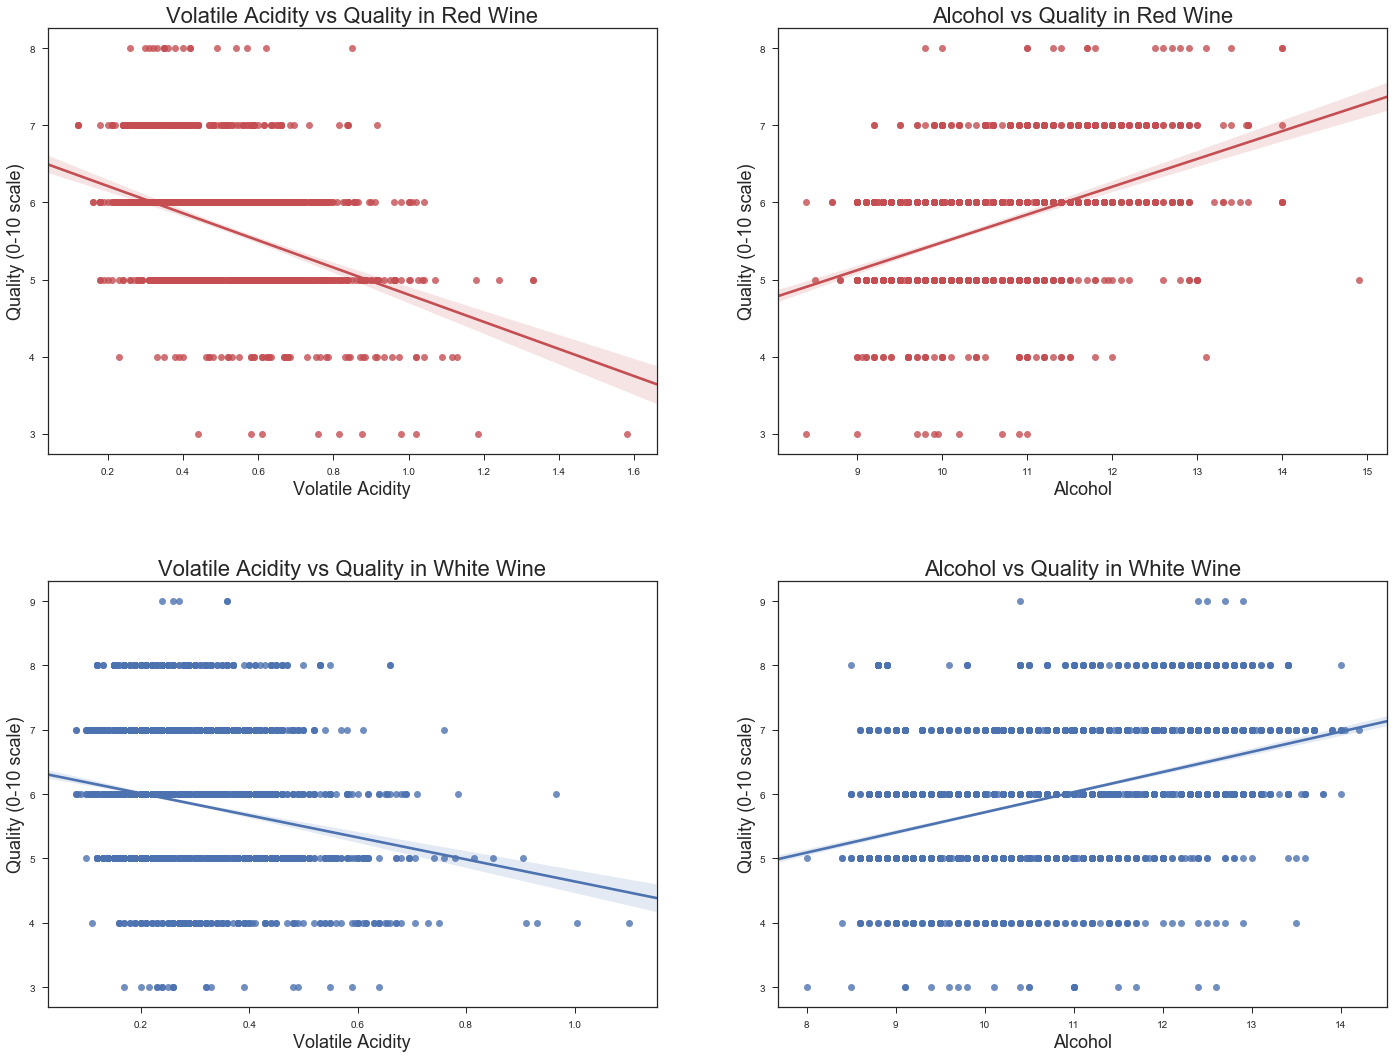

In [80]:
fig = plt.figure(figsize=(24,18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)


## 1st row - left panel
ax1 = fig.add_subplot(221)
x = red['volatile_acidity']
y = red['quality']
seaborn.regplot(x, y, fit_reg=True, data=red, color='C2')
plt.xlabel("Volatile Acidity", fontsize=18)
plt.ylabel("Quality (0-10 scale)", fontsize=18)
plt.title("Volatile Acidity vs Quality in Red Wine", fontsize=22)


## 1st row - right panel
ax2 = fig.add_subplot(222)
x = red['alcohol']
y = red['quality']
seaborn.regplot(x, y, fit_reg=True, data=red, color='C2')
plt.xlabel("Alcohol", fontsize=18)
plt.ylabel("Quality (0-10 scale)", fontsize=18)
plt.title("Alcohol vs Quality in Red Wine", fontsize=22)


## 2nd row - left panel
ax3 = fig.add_subplot(223)
x = white['volatile_acidity']
y = white['quality']
seaborn.regplot(x, y, fit_reg=True, data=white)
plt.xlabel("Volatile Acidity", fontsize=18)
plt.ylabel("Quality (0-10 scale)", fontsize=18)
plt.title("Volatile Acidity vs Quality in White Wine", fontsize=22)

## 2nd row - right panel
ax4 = fig.add_subplot(224)
x = white['alcohol']
y = white['quality']
seaborn.regplot(x, y, fit_reg=True, data=red)
plt.xlabel("Alcohol", fontsize=18)
plt.ylabel("Quality (0-10 scale)", fontsize=18)
plt.title("Alcohol vs Quality in White Wine", fontsize=22)

plt.savefig('C:\Users\jnavarro\Desktop\Data Science Fundamentals\Statistics for Data Science\Term Project\Plots\Quality_vs_vol_and_alc.jpeg')
plt.show();

In [35]:
#Prints all results in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Pearson Correlation
a = np.corrcoef(red.volatile_acidity,red.quality)
b = np.corrcoef(red.alcohol,red.quality)

c = np.corrcoef(white.volatile_acidity,white.quality)
d = np.corrcoef(white.alcohol,white.quality)

a
b
c
d

array([[ 1.        , -0.39055778],
       [-0.39055778,  1.        ]])

array([[ 1.        ,  0.47616632],
       [ 0.47616632,  1.        ]])

array([[ 1.        , -0.19472297],
       [-0.19472297,  1.        ]])

array([[ 1.        ,  0.43557472],
       [ 0.43557472,  1.        ]])

**Volatile Acidity and Quality in Red Wine**
- Not too strong negative correlation

**Alcohol and Quality and Red Wine**
- Not too strong positive correlation

**Volatile Acidity and Quality in White Wine**
- Not too strong negative correlation

**Alcohol and Quality and White Wine**
- Not too strong positive correlation

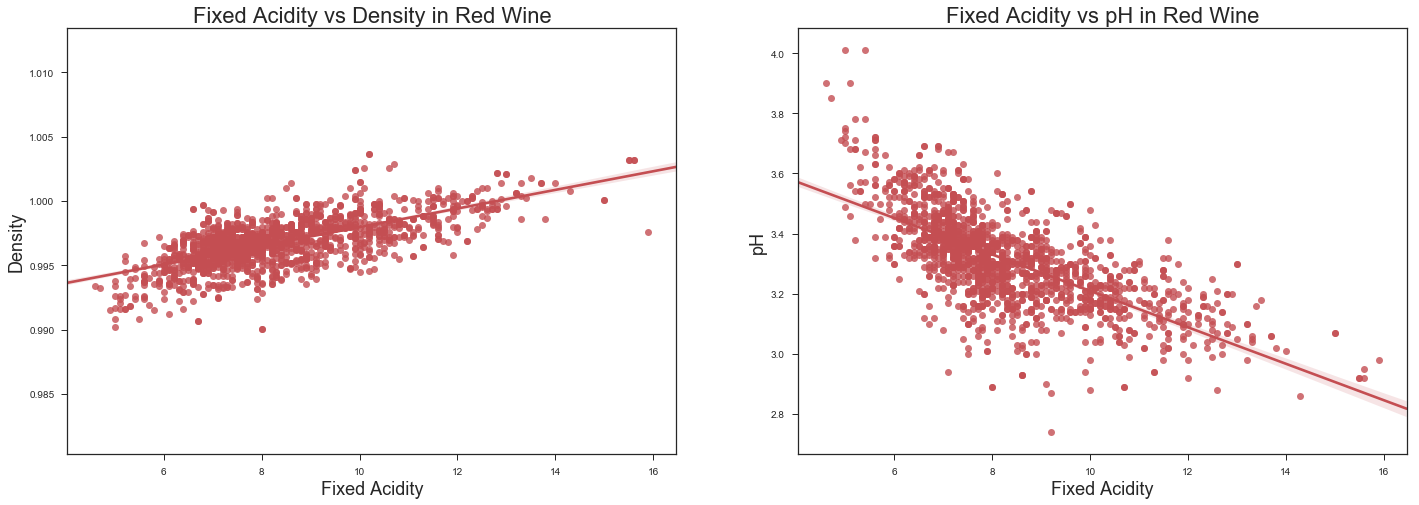

In [89]:
fig = plt.figure(figsize=(24,18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)


## 1st row - left panel
ax1 = fig.add_subplot(221)
x = red['fixed_acidity']
y = red['density']
seaborn.regplot(x, y, fit_reg=True, data=red, color='C2')
plt.xlabel("Fixed Acidity", fontsize=18)
plt.ylabel("Density", fontsize=18)
plt.title("Fixed Acidity vs Density in Red Wine", fontsize=22)


## 1st row - right panel
ax2 = fig.add_subplot(222)
x = red['fixed_acidity']
y = red['pH']
seaborn.regplot(x, y, fit_reg=True, data=red, color='C2')
plt.xlabel("Fixed Acidity", fontsize=18)
plt.ylabel("pH", fontsize=18)
plt.title("Fixed Acidity vs pH in Red Wine", fontsize=22)

plt.savefig('C:\Users\jnavarro\Desktop\Data Science Fundamentals\Statistics for Data Science\Term Project\Plots\Faci_vs_Dens.jpeg')
plt.show();

In [37]:
#Prints all results in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Pearson Correlation
a = np.corrcoef(red.fixed_acidity,red.density)
b = np.corrcoef(red.fixed_acidity,red.pH)

a
b

array([[ 1.        ,  0.66804729],
       [ 0.66804729,  1.        ]])

array([[ 1.        , -0.68297819],
       [-0.68297819,  1.        ]])

**Fixed Acidity and Density in Red Wine**
- Strong positive correlation

**Fixed Acidity and pH in Red Wine**
- Strong negative correlation

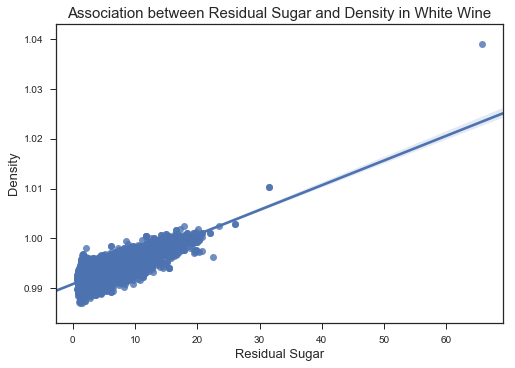

In [90]:
#Function for plotting scatter plot
import seaborn
def basic_linear(wine_set):
    scat0 = seaborn.regplot(x="residual_sugar", y="density", fit_reg=True, data=wine_set)
    plt.xlabel("Residual Sugar", fontsize=13)
    plt.ylabel("Density", fontsize=13)
    plt.title("Association between Residual Sugar and Density in White Wine", fontsize=15)
    plt.savefig('C:\Users\jnavarro\Desktop\Data Science Fundamentals\Statistics for Data Science\Term Project\Plots\Res_vs_Dens.jpeg')
    plt.show()

basic_linear(white)

In [39]:
### ANOTHER WAY TO calculate Pearson Correlation Coefficient
import scipy.stats
print(scipy.stats.pearsonr(white['density'], white["residual_sugar"]))

(0.83896645490458366, 0.0)


**Residual Sugar and Density in White Wine**
- Strong positive correlation

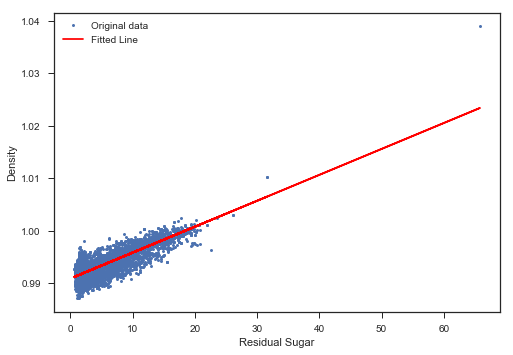

In [40]:
### ANOTHER WAY TO PLOT Association between Residual Sugar and Density in White Wine ###

#Regression with intercept for original data
result = sm.ols(formula='white.density ~ white.residual_sugar', data=white).fit()

#Graphical output for original data
plt.plot(white.residual_sugar, white.density, 'o', label='Original data', markersize=3)
intercept, slope = result.params
plt.plot(white.residual_sugar, intercept + slope * white.residual_sugar , 'r-', label='Fitted Line')
plt.xlabel('Residual Sugar')
plt.ylabel('Density')
plt.legend()
plt.show();

# Multiple Regression

In [41]:
# Forward Selection Algorithm
#http://planspace.org/20150423-forward_selection_with_statsmodels/

import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

## ORIGINAL DATA

### Red Wine: All Predictors Model

In [42]:
#Regression with intercept for original data
redall = sm.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=red).fit()
redall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Wed, 06 Dec 2017   Prob (F-statistic):          1.79e-145
Time:                        16:13:24   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.9652     21.195      1.036      0.300     -19.607      63.538
fixed_acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile_acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric_acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual_sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free_sulfur_dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total_sulfur_dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Red Wine: Forward Selection Model

Note: I did this manually for the Red Wine data set and came to same conclusion than the algorithm

In [43]:
redmodel = forward_selected(red, 'quality')
redmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     111.8
Date:                Wed, 06 Dec 2017   Prob (F-statistic):          3.55e-148
Time:                        16:13:45   Log-Likelihood:                -1569.9
No. Observations:                1599   AIC:                             3158.
Df Residuals:                    1590   BIC:                             3206.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.6681      0.461     10.129      0.000       3.764       5.572
alcohol                  0.2929      0.017     17.099      0.000       0.259       0.326
volatile_acidity        -1.0736      0.116     -9.260      0.000      -1.301      -0.846
sulphates                0.8914      0.110      8.088      0.000       0.675       1.108
total_sulfur_dioxide    -0.0034      0.001     -4.840      0.000      -0.005      -0.002
chlorides               -1.9494      0.403     -4.841      0.000      -2.739      -1.160
pH                      -0.5492      0.133     -4.125      0.000      -0.810      -0.288
free_sulfur_dioxide      0.0048      0.002      2.218      0.027       0.001       0.009
citric_acid             -0.1295      0.122     -1.064      0.288      -0.368       0.109
==============================================================================
Omnibus:                       23.385   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.045
Skew:                          -0.150   Prob(JB):                     4.05e-08
Kurtosis:                       3.649   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual Plots - Red Wine Forward Selection model

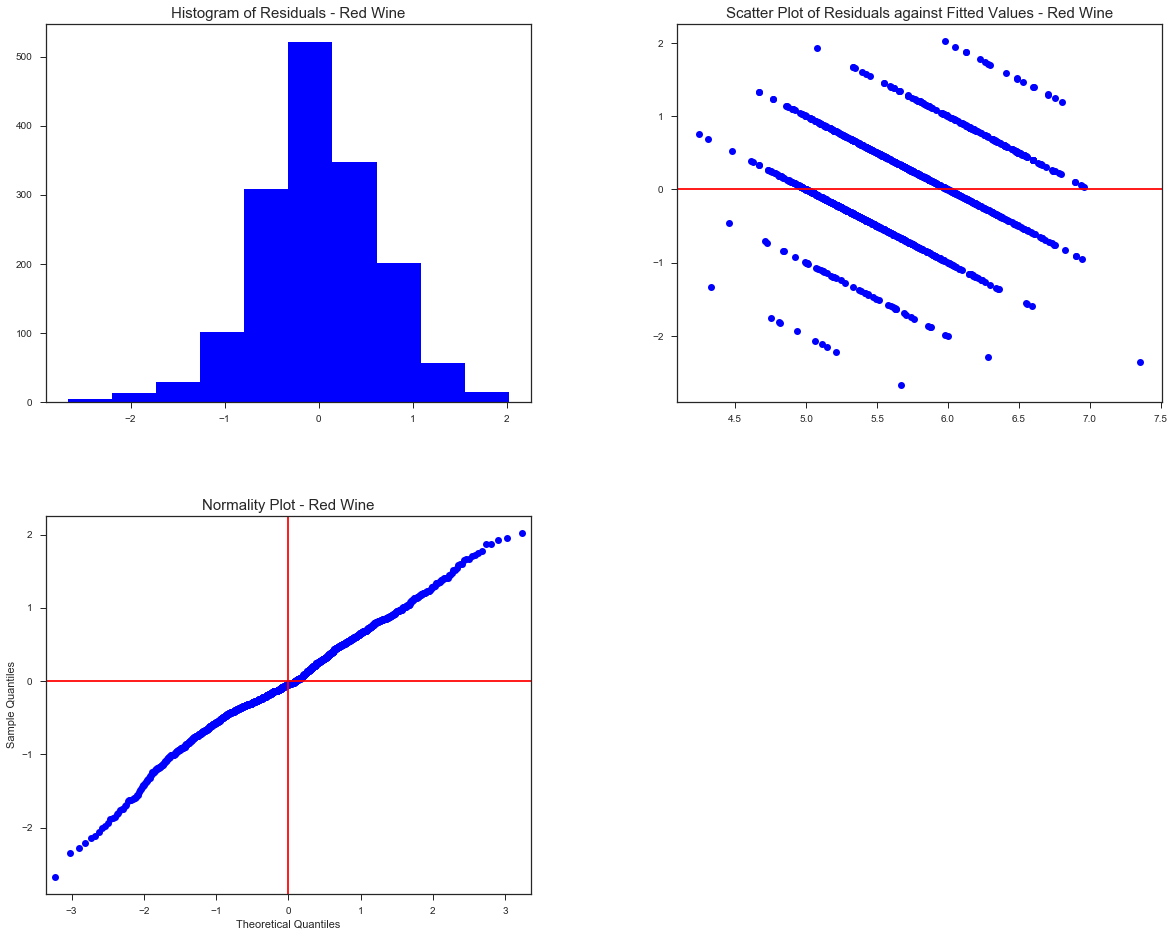

In [92]:
fig = plt.figure(figsize=(20,16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

###Color of 3rd plot was royal blue by default, so I made plot 1 and 2 to have the same color

## 1st row - left panel
ax1 = fig.add_subplot(221)
ax1.set_title('Histogram of Residuals - Red Wine', fontsize=15)
# histogram of residuals
ax1.hist(redmodel.resid, color='b')


## 1st row - right panel
ax2 = fig.add_subplot(222)
ax2.set_title('Scatter Plot of Residuals against Fitted Values - Red Wine', fontsize=15)
# scatterplot of residuals against fitted values
ax2.plot(redmodel.fittedvalues, redmodel.resid, 'o', color='b')
ax2.axhline(y=0, color='r')


## 2nd row - left panel
ax3 = fig.add_subplot(223)
ax3.set_title('Normality Plot - Red Wine', fontsize=15)
# normal plot of residuals
import statsmodels.api as sm
pp1 = sm.ProbPlot(redmodel.resid)
pp1.qqplot(ax=ax3)
ax3.axhline(y=0, color='r')
ax3.axvline(x=0, color='r')

plt.savefig('C:\Users\jnavarro\Desktop\Data Science Fundamentals\Statistics for Data Science\Term Project\Plots\Res_Plot_Red.jpeg')
plt.show();

**Red Wine - Original Data:**

All Predictors Model:

    Adj. R-squared: 	0.356
        
        
Forward Selection Model:

    Adj. R-squared: 	0.357
    alcohol, volatile_acidity, sulphates, total_sulfur_dioxide, chlorides, pH, free_sulfur_dioxide, citric_acid

Forward Selection Model for Red Wine **fits** the assumptions

### White Wine: All Predictors Model

In [47]:
whiteall = sm.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=white).fit()
whiteall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 06 Dec 2017   Prob (F-statistic):               0.00
Time:                        16:15:28   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              150.1928     18.804      7.987      0.000     113.328     187.057
fixed_acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile_acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric_acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual_sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free_sulfur_dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total_sulfur_dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### White Wine: Forward Selection model

In [48]:
whitemodel = forward_selected(white, 'quality')
whitemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Wed, 06 Dec 2017   Prob (F-statistic):               0.00
Time:                        16:15:39   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             154.1062     18.100      8.514      0.000     118.622     189.591
alcohol                 0.1932      0.024      8.021      0.000       0.146       0.240
volatile_acidity       -1.8881      0.110    -17.242      0.000      -2.103      -1.673
residual_sugar          0.0828      0.007     11.370      0.000       0.069       0.097
free_sulfur_dioxide     0.0033      0.001      4.950      0.000       0.002       0.005
density              -154.2913     18.344     -8.411      0.000    -190.254    -118.329
pH                      0.6942      0.103      6.717      0.000       0.492       0.897
sulphates               0.6285      0.100      6.287      0.000       0.433       0.824
fixed_acidity           0.0681      0.020      3.333      0.001       0.028       0.108
==============================================================================
Omnibus:                      114.194   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.255
Skew:                           0.075   Prob(JB):                     2.76e-55
Kurtosis:                       4.099   Cond. No.                     9.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual Plots - White Wine Forward Selection model

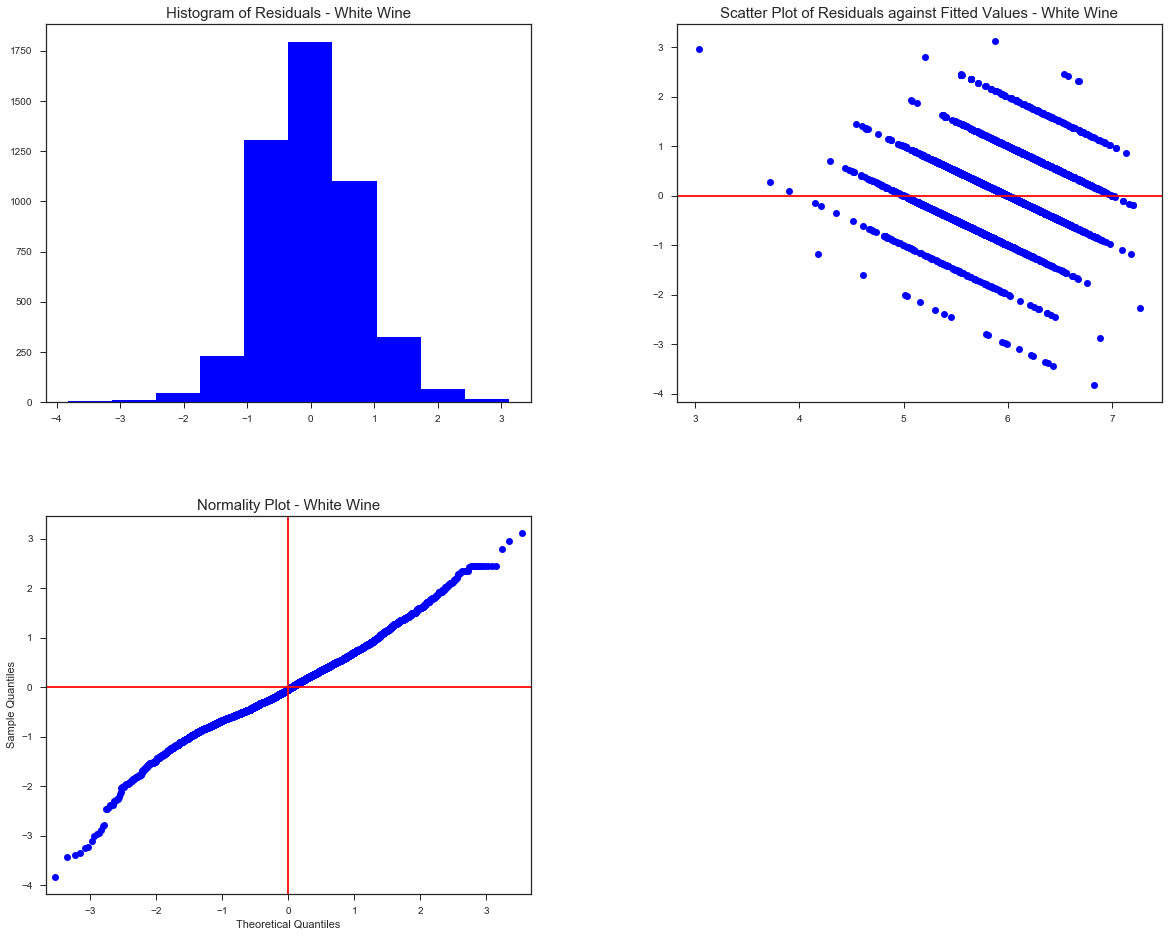

In [93]:
fig = plt.figure(figsize=(20,16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

###Color of 3rd plot was royal blue by default, so I made plot 1 and 2 to have the same color

## 1st row - left panel
ax1 = fig.add_subplot(221)
ax1.set_title('Histogram of Residuals - White Wine', fontsize=15)
# histogram of residuals
ax1.hist(whitemodel.resid, color='b')


## 1st row - right panel
ax2 = fig.add_subplot(222)
ax2.set_title('Scatter Plot of Residuals against Fitted Values - White Wine', fontsize=15)
# scatterplot of residuals against fitted values
ax2.plot(whitemodel.fittedvalues, whitemodel.resid, 'o', color='b')
ax2.axhline(y=0, color='r')


## 2nd row - left panel
ax3 = fig.add_subplot(223)
ax3.set_title('Normality Plot - White Wine', fontsize=15)
# normal plot of residuals
import statsmodels.api as sm
pp1 = sm.ProbPlot(whitemodel.resid)
pp1.qqplot(ax=ax3)
ax3.axhline(y=0, color='r')
ax3.axvline(x=0, color='r')

plt.savefig('C:\Users\jnavarro\Desktop\Data Science Fundamentals\Statistics for Data Science\Term Project\Plots\Res_Plot_white.jpeg')
plt.show();

**White Wine - Original Data:**

All Predictors Model:

    Adj. R-squared: 	0.280
        
Forward Selection Model:

    Adj. R-squared: 	0.281
    alcohol, volatile_acidity, residual_sugar, free_sulfur_dioxide, density, pH, sulphates, fixed acidity

Forward Selection Model for White Wine **fits** the assumptions

## TRANSFORMED DATA

**Logarithm:** I get this error LinAlgError: SVD did not converge

I think it is because the transformation produces some -inf values

Tred = np.log(red)
Twhite = np.log(white)

Moving on...

**Exponential:**

In [52]:
#Transform using exponential
Tred = np.exp(red)
Twhite = np.exp(white)

#RED WINE - ALL PREDICTORS MODEL
Tredall = sm.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=Tred).fit()
test5 = sm.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=Tred).fit().rsquared_adj
print ("Adj. R-squared:",test5)

#RED WINE - FORWARD SELECTION
Tredmodel = forward_selected(Tred, 'quality')
test6 = forward_selected(Tred, 'quality').rsquared_adj
print ("Adj. R-squared:",test6)

#WHITE WINE - ALL PREDICTORS MODEL
Twhiteall = sm.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=Twhite).fit()
test7 = sm.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=Twhite).fit().rsquared_adj
print ("Adj. R-squared:",test7)

#WHITE WINE - FORWARD SELECTION
Twhitemodel = forward_selected(Twhite, 'quality')
test8 = forward_selected(Twhite, 'quality').rsquared_adj
print ("Adj. R-squared:",test8)

('Adj. R-squared:', -0.93416064456042225)
('Adj. R-squared:', 0.20928617774628089)
('Adj. R-squared:', -0.74487902792765448)
('Adj. R-squared:', 0.13546829941314886)


**Square:**

In [53]:
Tred = np.square(red)
Twhite = np.square(white)

#RED WINE - ALL PREDICTORS MODEL
Tredall = sm.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=Tred).fit()
test5 = sm.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=Tred).fit().rsquared_adj
print ("Adj. R-squared:",test5)

#RED WINE - FORWARD SELECTION
Tredmodel = forward_selected(Tred, 'quality')
test6 = forward_selected(Tred, 'quality').rsquared_adj
print ("Adj. R-squared:",test6)

#WHITE WINE - ALL PREDICTORS MODEL
Twhiteall = sm.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=Twhite).fit()
test7 = sm.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=Twhite).fit().rsquared_adj
print ("Adj. R-squared:",test7)

#WHITE WINE - FORWARD SELECTION
Twhitemodel = forward_selected(Twhite, 'quality')
test8 = forward_selected(Twhite, 'quality').rsquared_adj
print ("Adj. R-squared:",test8)

('Adj. R-squared:', 0.34410567632749034)
('Adj. R-squared:', 0.34485956613190327)
('Adj. R-squared:', 0.25165164175910781)
('Adj. R-squared:', 0.25176395557293896)


**Square Root:**

In [54]:
Tred = np.sqrt(red)
Twhite = np.sqrt(white)

#RED WINE - ALL PREDICTORS MODEL
Tredall = sm.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=Tred).fit()
test5 = sm.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=Tred).fit().rsquared_adj
print ("Adj. R-squared:",test5)

#RED WINE - FORWARD SELECTION
Tredmodel = forward_selected(Tred, 'quality')
test6 = forward_selected(Tred, 'quality').rsquared_adj
print ("Adj. R-squared:",test6)

#WHITE WINE - ALL PREDICTORS MODEL
Twhiteall = sm.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=Twhite).fit()
test7 = sm.ols(formula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=Twhite).fit().rsquared_adj
print ("Adj. R-squared:",test7)

#WHITE WINE - FORWARD SELECTION
Twhitemodel = forward_selected(Twhite, 'quality')
test8 = forward_selected(Twhite, 'quality').rsquared_adj
print ("Adj. R-squared:",test8)

('Adj. R-squared:', 0.34969971079513285)
('Adj. R-squared:', 0.35041181855987225)
('Adj. R-squared:', 0.28559479190073844)
('Adj. R-squared:', 0.28559479190074055)


**Original Data - Best Adj. R-squared values:**
    
    Red Wine - Forward Selection Model: Adj. R-squared: 0.357
        
    White Wine - Forward Selection Model: Adj. R-squared: 0.281
    

**Transformed Data:**
- For Red Wine, no transformation yielded  an Adj. R-squared value higher than 0.357

- For White Wine, the forward selection model of the Square Root transformation yielded an Adj. R-squared value higher than 0.281 (**0.286**).

In [55]:
#WHITE WINE - FORWARD SELECTION - SQUARE ROOT TRANSFORMATION
Twhitemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     179.0
Date:                Wed, 06 Dec 2017   Prob (F-statistic):               0.00
Time:                        16:22:58   Log-Likelihood:                 2181.2
No. Observations:                4898   AIC:                            -4338.
Df Residuals:                    4886   BIC:                            -4260.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               41.2294      6.007      6.864      0.000      29.454      53.005
alcohol                  0.3255      0.028     11.533      0.000       0.270       0.381
volatile_acidity        -0.4490      0.027    -16.809      0.000      -0.501      -0.397
residual_sugar           0.0633      0.006     10.441      0.000       0.051       0.075
free_sulfur_dioxide      0.0157      0.002      7.479      0.000       0.012       0.020
density                -40.7388      6.068     -6.713      0.000     -52.636     -28.842
sulphates                0.1680      0.030      5.664      0.000       0.110       0.226
pH                       0.3443      0.072      4.801      0.000       0.204       0.485
total_sulfur_dioxide    -0.0036      0.002     -1.999      0.046      -0.007   -6.98e-05
chlorides               -0.1083      0.064     -1.697      0.090      -0.233       0.017
citric_acid              0.0345      0.023      1.525      0.127      -0.010       0.079
fixed_acidity            0.0234      0.021      1.136      0.256      -0.017       0.064
==============================================================================
Omnibus:                      191.633   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              501.604
Skew:                          -0.172   Prob(JB):                    1.20e-109
Kurtosis:                       4.530   Cond. No.                     5.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Residual Plot Comparison of best models of White Wine

## Best Original vs Best Transformed (Square Root)

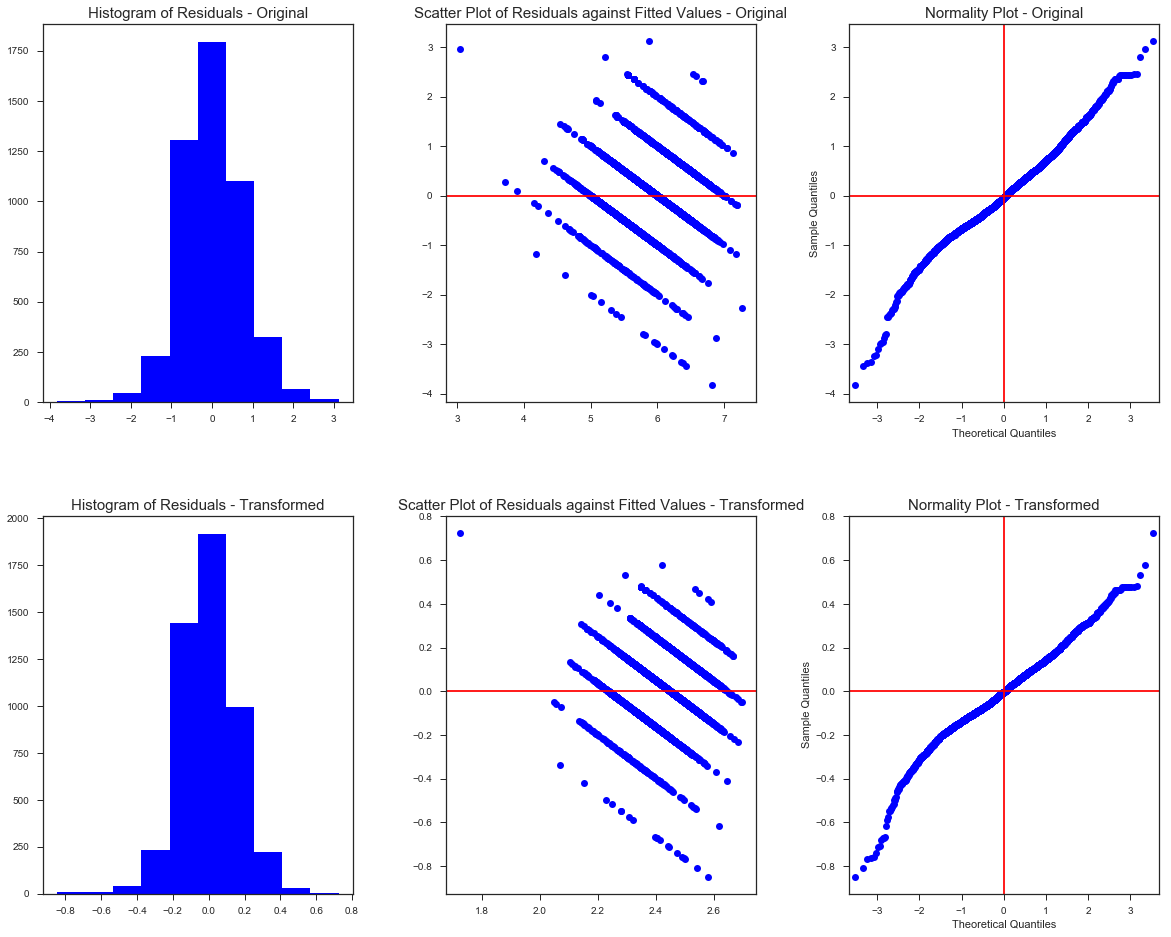

In [94]:
fig = plt.figure(figsize=(20,16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

###Color of 3rd plot was royal blue by default, so I made plot 1 and 2 to have the same color

## 1st row - left panel
ax1 = fig.add_subplot(231)
ax1.set_title('Histogram of Residuals - Original', fontsize=15)
# histogram of residuals
ax1.hist(whitemodel.resid, color='b')


## 1st row - right panel
ax2 = fig.add_subplot(232)
ax2.set_title('Scatter Plot of Residuals against Fitted Values - Original', fontsize=15)
# scatterplot of residuals against fitted values
ax2.plot(whitemodel.fittedvalues, whitemodel.resid, 'o', color='b')
ax2.axhline(y=0, color='r')


## 2nd row - left panel
ax3 = fig.add_subplot(233)
ax3.set_title('Normality Plot - Original', fontsize=15)
# normal plot of residuals
import statsmodels.api as sm
pp1 = sm.ProbPlot(whitemodel.resid)
pp1.qqplot(ax=ax3)
ax3.axhline(y=0, color='r')
ax3.axvline(x=0, color='r')

## 1st row - left panel
ax4 = fig.add_subplot(234)
ax4.set_title('Histogram of Residuals - Transformed', fontsize=15)
# histogram of residuals
ax4.hist(Twhitemodel.resid, color='b')


## 1st row - right panel
ax5 = fig.add_subplot(235)
ax5.set_title('Scatter Plot of Residuals against Fitted Values - Transformed', fontsize=15)
# scatterplot of residuals against fitted values
ax5.plot(Twhitemodel.fittedvalues, Twhitemodel.resid, 'o', color='b')
ax5.axhline(y=0, color='r')


## 2nd row - left panel
ax6 = fig.add_subplot(236)
ax6.set_title('Normality Plot - Transformed', fontsize=15)
# normal plot of residuals
import statsmodels.api as sm
pp1 = sm.ProbPlot(Twhitemodel.resid)
pp1.qqplot(ax=ax6)
ax6.axhline(y=0, color='r')
ax6.axvline(x=0, color='r')

plt.savefig('C:\Users\jnavarro\Desktop\Data Science Fundamentals\Statistics for Data Science\Term Project\Plots\Res_Plot_white_OvsT.jpeg')
plt.show();

Although there is an improvement in Adj. R-squared (from 0.281 to 0.286), the residual plots look almost identical. The transformed data does not improve too much the residuals to justify the use of the Transformed model as the final working model.
Furthermore, the forward selected model of transformed data includes all 11 predictors which seems odd.

**The Verdict:**
Best Models in my opinion are the **Forward Selected models** of **Original** data for Red and White wine. The model fit the assumptions.

# Prediction

In [57]:
#creating a DataFrame and manually adding values to predictors
#Predictors of best model for Red Wine:
#alcohol, volatile_acidity, sulphates, total_sulfur_dioxide, chlorides, pH, free_sulfur_dioxide, citric_acid
df_new = pd.DataFrame([[7.4,0.70,0.56,34,0.076,3.51,11,0.00]], columns=['alcohol', 'volatile_acidity', 'sulphates', 'total_sulfur_dioxide', 'chlorides', 'pH', 'free_sulfur_dioxide', 'citric_acid'])

#Prediction
redmodel.predict(df_new)

0    4.445307
dtype: float64

In [58]:
#creating a DataFrame and manually adding values to predictors
#Predictors of best model for White Wine:
#alcohol, volatile_acidity, residual_sugar, free_sulfur_dioxide, density, pH, sulphates, fixed acidity
df_new = pd.DataFrame([[15,0.70,1,11,0.9970,2,0.60,8]], columns=['alcohol', 'volatile_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'fixed_acidity'])

#Prediction
whitemodel.predict(df_new)

0    4.283639
dtype: float64